In [20]:
import pandas as pd

df = pd.read_csv('D:/Tugas Akhir/Codingan/Development/App/data/all_data.csv')
df.head()

,employee_id,Nama,domisili,jenis_kelamin,date_of_birth,join_date,resign_date,marriage_stat,dependant,education,absent_90D,avg_time_work,departemen,position,income,total_komp,job_satisfaction,performance_rating,churn_status
0,EM10510,Jayeng Winarno,Kota Jakarta Utara,Laki-laki,1983-09-11,2021-02-09,2023-06-22,Married,1,SLTA,9.0,9.28,Corporate Strategy & Communications,Manager,1.213117e+07,NaN,4,3,1
1,EM4322,Cakrabuana Sitompul,Kabupaten Bekasi,Perempuan,1987-03-22,2022-02-28,2023-04-04,Married,1,SLTA,0.0,9.65,Marketing,Staff,1.060575e+06,NaN,2,1,1
2,EM1637,Bagas Wulandari,Kota Jakarta Barat,Laki-laki,1970-04-27,2020-12-23,2023-03-25,Married,4,D2,4.0,9.83,Corporate Strategy & Communications,Manager,1.030081e+07,NaN,3,3,1
3,EM14613,Dimas Kuswandari,Kota Jakarta Pusat,Laki-laki,1988-06-10,2022-11-21,2024-03-23,Married,1,D3,2.0,9.77,Creative & Design,Staff,4.602479e+06,NaN,2,3,1
4,EM1084,Janet Utama,Kabupaten Bogor,Perempuan,1977-05-25,2021-06-07,2023-07-21,Married,3,SLTA,0.0,9.08,Corporate Strategy & Communications,Manager,1.405145e+07,NaN,4,3,1


# Exploratory Data Analysis

1. Melihat deskripsi data

In [21]:
desc = df.describe()
num_cols = 10
total_cols = len(desc.columns)

desc_chunks = [desc.iloc[:, i:i+num_cols] for i in range(0, total_cols, num_cols)]

for chunk in desc_chunks:
    display(chunk)

,dependant,absent_90D,avg_time_work,income,total_komp,job_satisfaction,performance_rating,churn_status
count,15488.000000,15173.000000,15488.000000,1.548800e+04,1909.000000,15488.000000,15488.000000,15488.000000
mean,1.450542,4.267449,9.447128,6.870134e+06,1.278156,2.655282,2.652247,0.292162
std,1.284839,3.813911,0.260906,4.027861e+06,1.151359,1.010392,1.022729,0.454771
min,0.000000,0.000000,9.000000,1.003626e+06,1.000000,1.000000,1.000000,0.000000
25%,0.000000,1.000000,9.220000,3.582206e+06,1.000000,2.000000,2.000000,0.000000
50%,1.000000,3.000000,9.440000,6.102698e+06,1.000000,3.000000,3.000000,0.000000
75%,2.000000,6.000000,9.680000,1.014167e+07,1.000000,3.000000,3.000000,1.000000
max,22.000000,16.000000,11.580000,2.407564e+07,24.000000,4.000000,4.000000,1.000000


2. Melihat data kosong

In [22]:
na_counts = df.isna().sum()

num_cols = 10
total_cols = len(na_counts)

for i in range(0, total_cols, num_cols):
    display(pd.DataFrame(na_counts[i:i+num_cols]).T)

,employee_id,Nama,domisili,jenis_kelamin,date_of_birth,join_date,resign_date,marriage_stat,dependant,education
0,0,0,0,0,0,0,7972,0,0,0


,absent_90D,avg_time_work,departemen,position,income,total_komp,job_satisfaction,performance_rating,churn_status
0,315,0,0,0,0,13579,0,0,0


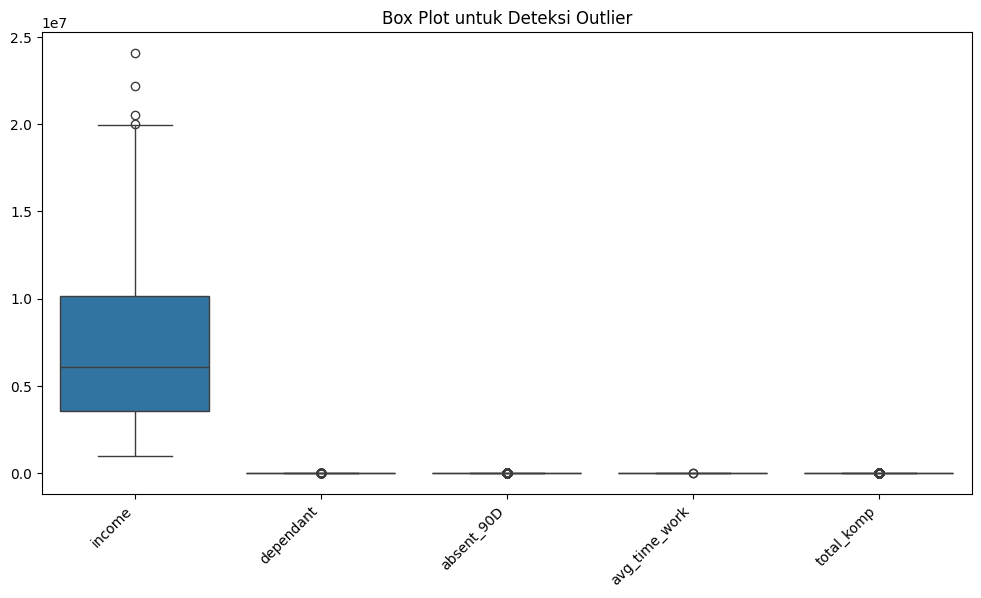

Jumlah Data Sebelum Dihapus: 15488


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['income', 'dependant', 'absent_90D', 'avg_time_work', 'total_komp']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=45, ha='right')
plt.title('Box Plot untuk Deteksi Outlier')
plt.show()

print(f'Jumlah Data Sebelum Dihapus: {len(df)}')

In [25]:
import pandas as pd

df_cek = df.copy()

df_cek['join_date'] = pd.to_datetime(df_cek['join_date'])
df_cek['resign_date'] = pd.to_datetime(df_cek['resign_date'])

df_cek['selisih_bulan'] = (df_cek['resign_date'] - df_cek['join_date']) / pd.Timedelta(days=30)

df_cek_changed = df_cek[(df_cek['selisih_bulan'] < 3) & (df_cek['churn_status'] == 0)]

df_cek.drop(columns=['selisih_bulan'], inplace=True)

df_cek_changed[['employee_id', 'join_date', 'resign_date', 'churn_status']]

,employee_id,join_date,resign_date,churn_status
4231,EM4066,2024-09-07,2024-10-31,0
4340,EM10343,2024-08-28,2024-10-31,0
4675,EM11840,2024-09-13,2024-10-31,0
4920,EM7048,2024-08-11,2024-10-31,0
6632,EM14096,2024-08-09,2024-10-31,0
7189,EM5167,2024-09-05,2024-10-31,0
7402,EM8034,2024-08-14,2024-10-31,0
7488,EM0515,2024-09-01,2024-10-31,0
7523,EM0635,2024-08-29,2024-10-31,0
7528,EM3932,2024-08-14,2024-10-31,0


# Preprocessing

In [7]:
kolom_tertentu = ['absent_90D', 'total_komp']
df[kolom_tertentu] = df[kolom_tertentu].fillna(0)
df['resign_date'] = '2024-10-31'

na_counts = df.isna().sum()

num_cols = 10
total_cols = len(na_counts)

for i in range(0, total_cols, num_cols):
    display(pd.DataFrame(na_counts[i:i+num_cols]).T)

,employee_id,domisili,jenis_kelamin,date_of_birth,join_date,resign_date,marriage_stat,dependant,education,absent_90D
0,0,0,0,0,0,0,0,0,0,0


,avg_time_work,departemen,position,income,total_komp,job_satisfaction,performance_rating,churn_status
0,0,0,0,0,0,0,0,0


In [8]:
desc = df.describe()
num_cols = 10
total_cols = len(desc.columns)

desc_chunks = [desc.iloc[:, i:i+num_cols] for i in range(0, total_cols, num_cols)]

for chunk in desc_chunks:
    display(chunk)

,dependant,absent_90D,avg_time_work,income,total_komp,job_satisfaction,performance_rating,churn_status
count,15488.000000,15488.000000,15488.000000,1.548800e+04,15488.000000,15488.000000,15488.000000,15488.000000
mean,1.450542,4.180656,9.447128,6.870134e+06,0.157541,2.655282,2.652247,0.293388
std,1.284839,3.822687,0.260906,4.027861e+06,0.582986,1.010392,1.022729,0.455330
min,0.000000,0.000000,9.000000,1.003626e+06,0.000000,1.000000,1.000000,0.000000
25%,0.000000,1.000000,9.220000,3.582206e+06,0.000000,2.000000,2.000000,0.000000
50%,1.000000,3.000000,9.440000,6.102698e+06,0.000000,3.000000,3.000000,0.000000
75%,2.000000,6.000000,9.680000,1.014167e+07,0.000000,3.000000,3.000000,1.000000
max,22.000000,16.000000,11.580000,2.407564e+07,24.000000,4.000000,4.000000,1.000000


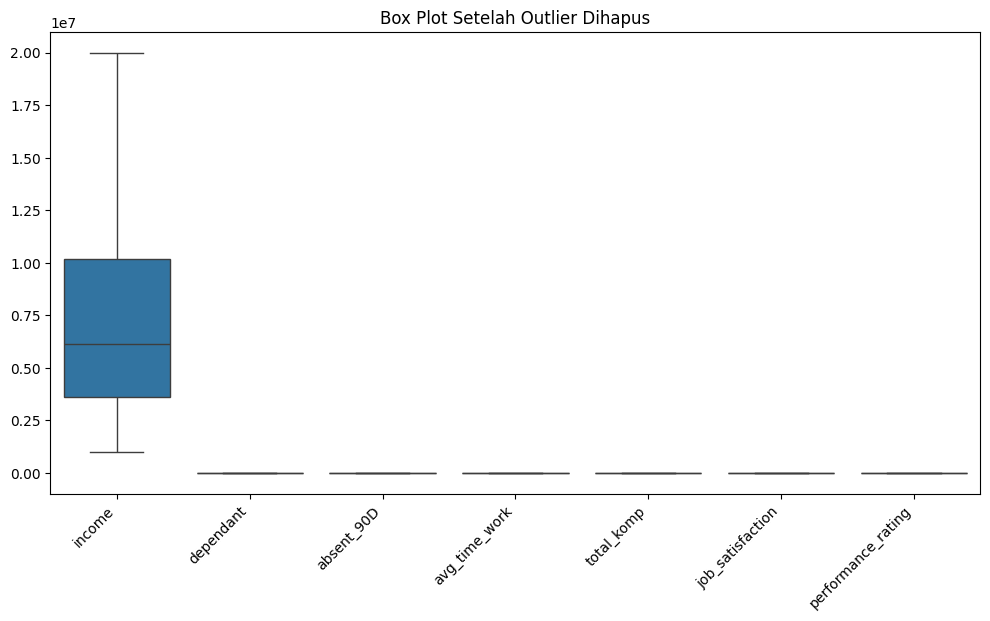

Jumlah Data Sesudah Dihapus: 13066


In [9]:
numerical_columns = ['income', 'dependant', 'absent_90D', 'avg_time_work', 'total_komp', 'job_satisfaction', 'performance_rating']

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=45, ha='right')
plt.title('Box Plot Setelah Outlier Dihapus')
plt.show()

print(f'Jumlah Data Sesudah Dihapus: {len(df)}')

In [11]:
import pandas as pd

# Jumlah baris sebelum filter
print(f"Jumlah baris sebelum filter: {df.shape[0]}")

df['join_date'] = pd.to_datetime(df['join_date'])
df['resign_date'] = pd.to_datetime(df['resign_date'])

# Hitung jumlah yang resign kurang dari 3 bulan setelah join
short_term_resign = df[(df['resign_date'] - df['join_date']).dt.days < 90]
print(f"Jumlah baris dengan resign_date - join_date < 3 bulan sebelum filter: {short_term_resign.shape[0]}")

# Lakukan filter (hapus yang kurang dari 3 bulan)
df = df[(df['resign_date'] - df['join_date']).dt.days >= 90]

# Jumlah baris setelah filter
print(f"Jumlah baris setelah filter: {df.shape[0]}")

Jumlah baris sebelum filter: 13066
Jumlah baris dengan resign_date - join_date < 3 bulan sebelum filter: 443
Jumlah baris setelah filter: 12623


# Feature Engineering

In [12]:
df["active_work"] = (df["resign_date"] - df["join_date"]).dt.days
df.head()

,employee_id,domisili,jenis_kelamin,date_of_birth,join_date,resign_date,marriage_stat,dependant,education,absent_90D,avg_time_work,departemen,position,income,total_komp,job_satisfaction,performance_rating,churn_status,active_work
0,EM10510,Kota Jakarta Utara,Laki-laki,1983-09-11,2021-02-09,2024-10-31,Married,1,SLTA,9.0,9.28,Corporate Strategy & Communications,Manager,1.213117e+07,0.0,4,3,1,1360
1,EM4322,Kabupaten Bekasi,Perempuan,1987-03-22,2022-02-28,2024-10-31,Married,1,SLTA,0.0,9.65,Marketing,Staff,1.060575e+06,0.0,2,1,1,976
2,EM1637,Kota Jakarta Barat,Laki-laki,1970-04-27,2020-12-23,2024-10-31,Married,4,D2,4.0,9.83,Corporate Strategy & Communications,Manager,1.030081e+07,0.0,3,3,1,1408
3,EM14613,Kota Jakarta Pusat,Laki-laki,1988-06-10,2022-11-21,2024-10-31,Married,1,D3,2.0,9.77,Creative & Design,Staff,4.602479e+06,0.0,2,3,1,710
4,EM1084,Kabupaten Bogor,Perempuan,1977-05-25,2021-06-07,2024-10-31,Married,3,SLTA,0.0,9.08,Corporate Strategy & Communications,Manager,1.405145e+07,0.0,4,3,1,1242


In [13]:
df["active_work"] = (df["resign_date"] - df["join_date"]).dt.days
df["active_work_months"] = df["active_work"] // 30
df["income_3_months"] = df["income"] * 3
df["income_6_months"] = df["income"] * 6
df["total_income_work"] = df["income"] * df["active_work_months"]
df.head()

,employee_id,domisili,jenis_kelamin,date_of_birth,join_date,resign_date,marriage_stat,dependant,education,absent_90D,...,income,total_komp,job_satisfaction,performance_rating,churn_status,active_work,active_work_months,income_3_months,income_6_months,total_income_work
0,EM10510,Kota Jakarta Utara,Laki-laki,1983-09-11,2021-02-09,2024-10-31,Married,1,SLTA,9.0,...,1.213117e+07,0.0,4,3,1,1360,45,3.639351e+07,7.278702e+07,5.459027e+08
1,EM4322,Kabupaten Bekasi,Perempuan,1987-03-22,2022-02-28,2024-10-31,Married,1,SLTA,0.0,...,1.060575e+06,0.0,2,1,1,976,32,3.181725e+06,6.363450e+06,3.393840e+07
2,EM1637,Kota Jakarta Barat,Laki-laki,1970-04-27,2020-12-23,2024-10-31,Married,4,D2,4.0,...,1.030081e+07,0.0,3,3,1,1408,46,3.090244e+07,6.180489e+07,4.738375e+08
3,EM14613,Kota Jakarta Pusat,Laki-laki,1988-06-10,2022-11-21,2024-10-31,Married,1,D3,2.0,...,4.602479e+06,0.0,2,3,1,710,23,1.380744e+07,2.761487e+07,1.058570e+08
4,EM1084,Kabupaten Bogor,Perempuan,1977-05-25,2021-06-07,2024-10-31,Married,3,SLTA,0.0,...,1.405145e+07,0.0,4,3,1,1242,41,4.215435e+07,8.430870e+07,5.761095e+08


In [14]:
df["income_dependant_ratio"] = df["income"] / (df["dependant"] + 1)
df["work_efficiency"] = df["avg_time_work"] / 8
df.head()

,employee_id,domisili,jenis_kelamin,date_of_birth,join_date,resign_date,marriage_stat,dependant,education,absent_90D,...,job_satisfaction,performance_rating,churn_status,active_work,active_work_months,income_3_months,income_6_months,total_income_work,income_dependant_ratio,work_efficiency
0,EM10510,Kota Jakarta Utara,Laki-laki,1983-09-11,2021-02-09,2024-10-31,Married,1,SLTA,9.0,...,4,3,1,1360,45,3.639351e+07,7.278702e+07,5.459027e+08,6.065585e+06,1.16000
1,EM4322,Kabupaten Bekasi,Perempuan,1987-03-22,2022-02-28,2024-10-31,Married,1,SLTA,0.0,...,2,1,1,976,32,3.181725e+06,6.363450e+06,3.393840e+07,5.302875e+05,1.20625
2,EM1637,Kota Jakarta Barat,Laki-laki,1970-04-27,2020-12-23,2024-10-31,Married,4,D2,4.0,...,3,3,1,1408,46,3.090244e+07,6.180489e+07,4.738375e+08,2.060163e+06,1.22875
3,EM14613,Kota Jakarta Pusat,Laki-laki,1988-06-10,2022-11-21,2024-10-31,Married,1,D3,2.0,...,2,3,1,710,23,1.380744e+07,2.761487e+07,1.058570e+08,2.301240e+06,1.22125
4,EM1084,Kabupaten Bogor,Perempuan,1977-05-25,2021-06-07,2024-10-31,Married,3,SLTA,0.0,...,4,3,1,1242,41,4.215435e+07,8.430870e+07,5.761095e+08,3.512863e+06,1.13500


In [15]:
def categorize_work_duration_months(months):
    if months < 12:
        return "Short-term"
    elif 12 <= months <= 36:
        return "Mid-term"
    else:
        return "Long-term"

df['active_work_category'] = df['active_work_months'].apply(categorize_work_duration_months)
df.head()

,employee_id,domisili,jenis_kelamin,date_of_birth,join_date,resign_date,marriage_stat,dependant,education,absent_90D,...,performance_rating,churn_status,active_work,active_work_months,income_3_months,income_6_months,total_income_work,income_dependant_ratio,work_efficiency,active_work_category
0,EM10510,Kota Jakarta Utara,Laki-laki,1983-09-11,2021-02-09,2024-10-31,Married,1,SLTA,9.0,...,3,1,1360,45,3.639351e+07,7.278702e+07,5.459027e+08,6.065585e+06,1.16000,Long-term
1,EM4322,Kabupaten Bekasi,Perempuan,1987-03-22,2022-02-28,2024-10-31,Married,1,SLTA,0.0,...,1,1,976,32,3.181725e+06,6.363450e+06,3.393840e+07,5.302875e+05,1.20625,Mid-term
2,EM1637,Kota Jakarta Barat,Laki-laki,1970-04-27,2020-12-23,2024-10-31,Married,4,D2,4.0,...,3,1,1408,46,3.090244e+07,6.180489e+07,4.738375e+08,2.060163e+06,1.22875,Long-term
3,EM14613,Kota Jakarta Pusat,Laki-laki,1988-06-10,2022-11-21,2024-10-31,Married,1,D3,2.0,...,3,1,710,23,1.380744e+07,2.761487e+07,1.058570e+08,2.301240e+06,1.22125,Mid-term
4,EM1084,Kabupaten Bogor,Perempuan,1977-05-25,2021-06-07,2024-10-31,Married,3,SLTA,0.0,...,3,1,1242,41,4.215435e+07,8.430870e+07,5.761095e+08,3.512863e+06,1.13500,Long-term


In [16]:
# Menghitung berbagai fitur baru

# Work Stability Score
df['work_stability_score'] = df['active_work_months'] / (df['absent_90D'] + 1)

# Job Income to Position Score
position_score_mapping = {'Junior': 2, 'Staff': 1, 'Senior': 3, 'Manager': 4}
df['position_score'] = df['position'].map(position_score_mapping)
df['job_income_position_score'] = df['income'] / df['position_score']

# Education-Adjusted Income
education_score_mapping = {'SLTA': 1, 'D1': 2, 'D2': 3, 'D3': 4, 'S1': 5, 'S2': 6, 'S3': 7}
df['education_score'] = df['education'].map(education_score_mapping)
df['education_income_ratio'] = df['income'] / df['education_score']

# Weighted Satisfaction-Performance Score
df['weighted_satisfaction_performance'] = (
    0.6 * df['job_satisfaction'] + 0.4 * df['performance_rating']
)

df.head()

,employee_id,domisili,jenis_kelamin,date_of_birth,join_date,resign_date,marriage_stat,dependant,education,absent_90D,...,total_income_work,income_dependant_ratio,work_efficiency,active_work_category,work_stability_score,position_score,job_income_position_score,education_score,education_income_ratio,weighted_satisfaction_performance
0,EM10510,Kota Jakarta Utara,Laki-laki,1983-09-11,2021-02-09,2024-10-31,Married,1,SLTA,9.0,...,5.459027e+08,6.065585e+06,1.16000,Long-term,4.500000,4,3.032793e+06,1,1.213117e+07,3.6
1,EM4322,Kabupaten Bekasi,Perempuan,1987-03-22,2022-02-28,2024-10-31,Married,1,SLTA,0.0,...,3.393840e+07,5.302875e+05,1.20625,Mid-term,32.000000,1,1.060575e+06,1,1.060575e+06,1.6
2,EM1637,Kota Jakarta Barat,Laki-laki,1970-04-27,2020-12-23,2024-10-31,Married,4,D2,4.0,...,4.738375e+08,2.060163e+06,1.22875,Long-term,9.200000,4,2.575204e+06,3,3.433605e+06,3.0
3,EM14613,Kota Jakarta Pusat,Laki-laki,1988-06-10,2022-11-21,2024-10-31,Married,1,D3,2.0,...,1.058570e+08,2.301240e+06,1.22125,Mid-term,7.666667,1,4.602479e+06,4,1.150620e+06,2.4
4,EM1084,Kabupaten Bogor,Perempuan,1977-05-25,2021-06-07,2024-10-31,Married,3,SLTA,0.0,...,5.761095e+08,3.512863e+06,1.13500,Long-term,41.000000,4,3.512863e+06,1,1.405145e+07,3.6


In [17]:
job_satisfaction_mapping = {1.0: 'Low', 2.0: 'Medium', 3.0: 'High', 4.0: 'Very High'}
df['job_satisfaction'] = df['job_satisfaction'].map(job_satisfaction_mapping)
df.head()

,employee_id,domisili,jenis_kelamin,date_of_birth,join_date,resign_date,marriage_stat,dependant,education,absent_90D,...,total_income_work,income_dependant_ratio,work_efficiency,active_work_category,work_stability_score,position_score,job_income_position_score,education_score,education_income_ratio,weighted_satisfaction_performance
0,EM10510,Kota Jakarta Utara,Laki-laki,1983-09-11,2021-02-09,2024-10-31,Married,1,SLTA,9.0,...,5.459027e+08,6.065585e+06,1.16000,Long-term,4.500000,4,3.032793e+06,1,1.213117e+07,3.6
1,EM4322,Kabupaten Bekasi,Perempuan,1987-03-22,2022-02-28,2024-10-31,Married,1,SLTA,0.0,...,3.393840e+07,5.302875e+05,1.20625,Mid-term,32.000000,1,1.060575e+06,1,1.060575e+06,1.6
2,EM1637,Kota Jakarta Barat,Laki-laki,1970-04-27,2020-12-23,2024-10-31,Married,4,D2,4.0,...,4.738375e+08,2.060163e+06,1.22875,Long-term,9.200000,4,2.575204e+06,3,3.433605e+06,3.0
3,EM14613,Kota Jakarta Pusat,Laki-laki,1988-06-10,2022-11-21,2024-10-31,Married,1,D3,2.0,...,1.058570e+08,2.301240e+06,1.22125,Mid-term,7.666667,1,4.602479e+06,4,1.150620e+06,2.4
4,EM1084,Kabupaten Bogor,Perempuan,1977-05-25,2021-06-07,2024-10-31,Married,3,SLTA,0.0,...,5.761095e+08,3.512863e+06,1.13500,Long-term,41.000000,4,3.512863e+06,1,1.405145e+07,3.6


In [18]:
performance_rating_mapping = {1.0: 'Low', 2.0: 'Good', 3.0: 'Excellent', 4.0: 'Outstanding'}
df['performance_rating'] = df['performance_rating'].map(performance_rating_mapping)
df.head()

,employee_id,domisili,jenis_kelamin,date_of_birth,join_date,resign_date,marriage_stat,dependant,education,absent_90D,...,total_income_work,income_dependant_ratio,work_efficiency,active_work_category,work_stability_score,position_score,job_income_position_score,education_score,education_income_ratio,weighted_satisfaction_performance
0,EM10510,Kota Jakarta Utara,Laki-laki,1983-09-11,2021-02-09,2024-10-31,Married,1,SLTA,9.0,...,5.459027e+08,6.065585e+06,1.16000,Long-term,4.500000,4,3.032793e+06,1,1.213117e+07,3.6
1,EM4322,Kabupaten Bekasi,Perempuan,1987-03-22,2022-02-28,2024-10-31,Married,1,SLTA,0.0,...,3.393840e+07,5.302875e+05,1.20625,Mid-term,32.000000,1,1.060575e+06,1,1.060575e+06,1.6
2,EM1637,Kota Jakarta Barat,Laki-laki,1970-04-27,2020-12-23,2024-10-31,Married,4,D2,4.0,...,4.738375e+08,2.060163e+06,1.22875,Long-term,9.200000,4,2.575204e+06,3,3.433605e+06,3.0
3,EM14613,Kota Jakarta Pusat,Laki-laki,1988-06-10,2022-11-21,2024-10-31,Married,1,D3,2.0,...,1.058570e+08,2.301240e+06,1.22125,Mid-term,7.666667,1,4.602479e+06,4,1.150620e+06,2.4
4,EM1084,Kabupaten Bogor,Perempuan,1977-05-25,2021-06-07,2024-10-31,Married,3,SLTA,0.0,...,5.761095e+08,3.512863e+06,1.13500,Long-term,41.000000,4,3.512863e+06,1,1.405145e+07,3.6


In [19]:
desc = df.describe()
num_cols = 10
total_cols = len(desc.columns)

desc_chunks = [desc.iloc[:, i:i+num_cols] for i in range(0, total_cols, num_cols)]

for chunk in desc_chunks:
    display(chunk)

,join_date,resign_date,dependant,absent_90D,avg_time_work,income,total_komp,churn_status,active_work,active_work_months
count,12623,12623,12623.000000,12623.000000,12623.000000,1.262300e+04,12623.0,12623.000000,12623.000000,12623.000000
mean,2022-04-05 15:06:34.422878720,2024-10-31 00:00:00.000000256,1.444189,3.985978,9.446067,6.857005e+06,0.0,0.266022,939.370435,30.838549
min,2020-01-02 00:00:00,2024-10-31 00:00:00,0.000000,0.000000,9.000000,1.003626e+06,0.0,0.000000,90.000000,3.000000
25%,2021-03-15 12:00:00,2024-10-31 00:00:00,0.000000,1.000000,9.220000,3.538828e+06,0.0,0.000000,552.500000,18.000000
50%,2022-05-30 00:00:00,2024-10-31 00:00:00,1.000000,3.000000,9.440000,6.102568e+06,0.0,0.000000,885.000000,29.000000
75%,2023-04-27 12:00:00,2024-10-31 00:00:00,2.000000,6.000000,9.680000,1.014884e+07,0.0,1.000000,1325.500000,44.000000
max,2024-08-02 00:00:00,2024-10-31 00:00:00,5.000000,13.000000,9.900000,1.997909e+07,0.0,1.000000,1764.000000,58.000000
std,NaN,NaN,1.231114,3.490900,0.260364,4.008731e+06,0.0,0.441894,442.120568,14.735031


,income_3_months,income_6_months,total_income_work,income_dependant_ratio,work_efficiency,work_stability_score,position_score,job_income_position_score,education_score,education_income_ratio
count,1.262300e+04,1.262300e+04,1.262300e+04,1.262300e+04,12623.000000,12623.000000,12623.000000,1.262300e+04,12623.000000,1.262300e+04
mean,2.057101e+07,4.114203e+07,2.114433e+08,3.422275e+06,1.180758,11.269302,2.259922,3.044300e+06,2.948586,3.196302e+06
min,3.010878e+06,6.021756e+06,3.622452e+06,2.069960e+05,1.125000,0.214286,1.000000,1.003626e+06,1.000000,7.516455e+05
25%,1.061649e+07,2.123297e+07,7.817140e+07,1.677444e+06,1.152500,3.555556,1.000000,2.408317e+06,1.000000,1.302578e+06
50%,1.830770e+07,3.661541e+07,1.601696e+08,2.758631e+06,1.180000,6.750000,2.000000,3.001308e+06,3.000000,2.139607e+06
75%,3.044652e+07,6.089304e+07,2.958879e+08,4.291924e+06,1.210000,14.000000,3.000000,3.702547e+06,5.000000,2.831084e+06
max,5.993727e+07,1.198745e+08,9.957052e+08,1.906798e+07,1.237500,58.000000,4.000000,5.970222e+06,6.000000,1.498861e+07
std,1.202619e+07,2.405238e+07,1.720408e+08,2.673627e+06,0.032546,11.855418,1.200611,9.639096e+05,1.665348,3.321544e+06


,weighted_satisfaction_performance
count,12623.000000
mean,2.659431
min,1.000000
25%,2.000000
50%,3.000000
75%,3.400000
max,4.000000
std,0.894740
